- OpenClassrooms Project 6, Data Scientist
- Author : Oumeima EL GHARBI
- Date : October, November 2022

### Importing libraries

In [1]:
%reset -f

import warnings
warnings.filterwarnings(action="ignore") # once

# to compute time of pipeline
from time import time, strftime, gmtime

# NLP
import nltk
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import words

# visualization
import seaborn as sns

from pandarallel import pandarallel

from NLP_functions.preprocess_NLP import *
from common_graphs import *

%matplotlib inline
%autosave 300

Autosaving every 300 seconds


In [2]:
# Starting time
t0 = time()

input_path = "./dataset/cleaned/"
input_filename = "data_text.csv"
input_file = "{}{}".format(input_path, input_filename)

output_path = "./dataset/cleaned/"
output_filename = "final_data_text.csv"
output_file = "{}{}".format(output_path, output_filename)

## Part I : Exploratory Data Analysis

##### General overview

In [3]:
data_text = pd.read_csv(input_file)

In [4]:
data_text.head(5)

,product_name,text,category,target
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4


In [5]:
data_text.tail(5)

,product_name,text,category,target
1045,Oren Empower Extra Large Self Adhesive Sticker,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,0
1046,Wallmantra Large Vinyl Sticker Sticker,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,0
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,0
1048,Wallmantra Medium Vinyl Sticker Sticker,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,0
1049,Uberlyfe Large Vinyl Sticker,Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...,Baby Care,0


In [6]:
data_text.sample(20)

,product_name,text,category,target
800,Lapguard SONY VAIO VGN-NW270DB_90 90 Adapter,Lapguard SONY VAIO VGN-NW270DB_90 90 Adapter (...,Computers,2
957,Nutcase Multicolor Column Floor Lamp,Key Features of Nutcase Multicolor Column Floo...,Home Decor & Festive Needs,3
435,"Smartpro 19.5v,3.9a Replacement Charger for Va...","Key Features of Smartpro 19.5v,3.9a Replacemen...",Computers,2
162,Prithish Believe In Yourself Double Color Cera...,Prithish Believe In Yourself Double Color Cera...,Kitchen & Dining,5
105,Shop Rajasthan Abstract Single Dohar Multicolor,Buy Shop Rajasthan Abstract Single Dohar Multi...,Home Furnishing,4
750,Rajasthan Crafts Abstract Single Quilts & Comf...,Buy Rajasthan Crafts Abstract Single Quilts & ...,Home Furnishing,4
102,K&P Lord Ganesha Regular 16 Showpiece - 13 cm,Key Features of K&P Lord Ganesha Regular 16 Sh...,Home Decor & Festive Needs,3
245,Kalash Kadhai 11.5 L,Buy Kalash Kadhai 11.5 L for Rs.1584 online. K...,Kitchen & Dining,5
173,Rockmantra Water Fire Ceramic Mug,Rockmantra Water Fire Ceramic Mug (5.5 l)\r\n ...,Kitchen & Dining,5
47,D-Link DAP1320,"Key Features of D-Link DAP1320 QRS app(iOS,And...",Computers,2


##### Global Statistics

In [7]:
data_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  1050 non-null   object
 1   text          1050 non-null   object
 2   category      1050 non-null   object
 3   target        1050 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 32.9+ KB


In [8]:
data_text.isna().sum()

product_name    0
text            0
category        0
target          0
dtype: int64

In [9]:
data_text.isna().mean()

product_name    0.0
text            0.0
category        0.0
target          0.0
dtype: float64

In [10]:
data_text.dtypes.value_counts()

object    3
int64     1
dtype: int64

In [11]:
data_text.nunique()

product_name    1050
text            1050
category           7
target             7
dtype: int64

In [12]:
data_text.shape

(1050, 4)

In [13]:
idx = data_text.duplicated(subset="text", keep="first")
data_text.loc[idx, :].sort_values("text")

,product_name,text,category,target


In [14]:
data_text.describe(include="object")

,product_name,text,category
count,1050,1050,1050
unique,1050,1050,7
top,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing
freq,1,1,150


In [15]:
data_text.target.value_counts(normalize=True)

4    0.142857
0    0.142857
6    0.142857
3    0.142857
5    0.142857
1    0.142857
2    0.142857
Name: target, dtype: float64

<AxesSubplot:ylabel='target'>

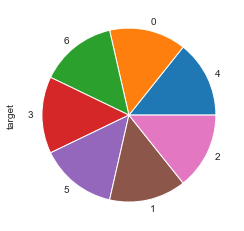

In [16]:
data_text.target.value_counts().plot(kind="pie")

##### Length

In [17]:
#data_text.text.apply(lambda i: len(i))

<AxesSubplot:xlabel='text'>

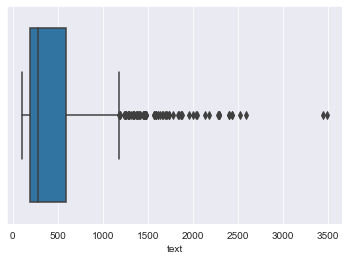

In [18]:
tmp = data_text.text.str.len()
data_text["_len_txt_"] = tmp

sns.boxplot(tmp)

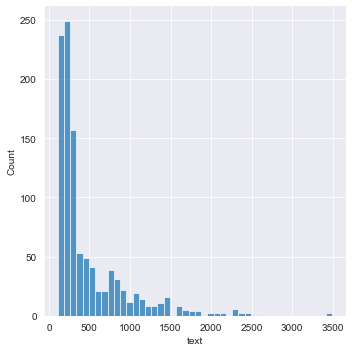

In [19]:
sns.displot(tmp)

<AxesSubplot:xlabel='product_name'>

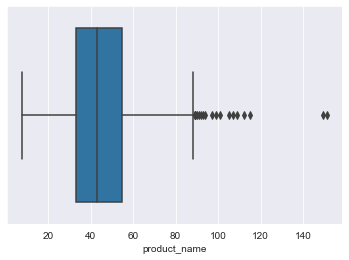

In [20]:
tmp = data_text.product_name.str.len()
data_text["_len_product_name_"] = tmp

sns.boxplot(tmp)

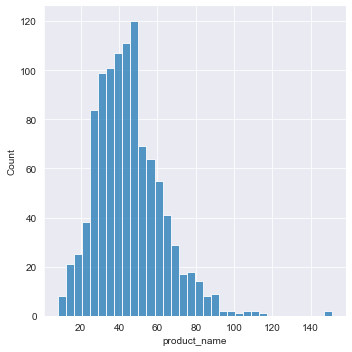

In [21]:
sns.displot(tmp)

In [22]:
data_text.head()

,product_name,text,category,target,_len_txt_,_len_product_name_
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4,1420,58
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0,444,26
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0,1258,35
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4,858,63
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4,1197,53


##### Multivariate analysis

In [23]:
corr = data_text.corr()
corr

,target,_len_txt_,_len_product_name_
target,1.000000,-0.020285,-0.011436
_len_txt_,-0.020285,1.000000,0.174393
_len_product_name_,-0.011436,0.174393,1.000000


<AxesSubplot:>

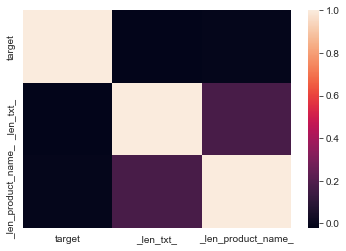

In [24]:
sns.heatmap(corr)

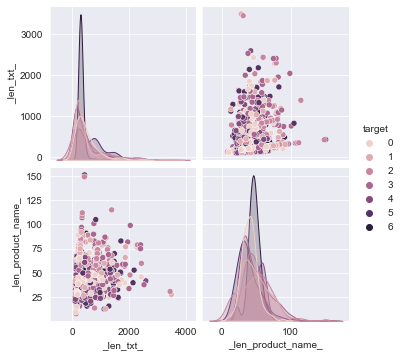

In [25]:
sns.pairplot(data_text, hue="target")

In [26]:
data_text.sort_values("_len_txt_").head(10)

,product_name,text,category,target,_len_txt_,_len_product_name_
877,Nkp Cotton Bath Towel,Buy Nkp Cotton Bath Towel at Rs. 549 at Flipka...,Home Furnishing,4,109,21
890,IWS Cotton Bath Towel,Buy IWS Cotton Bath Towel at Rs. 299 at Flipka...,Home Furnishing,4,109,21
1030,OMRD RD6697 Hot and cold Pack,Specifications of OMRD RD6697 Hot and cold Pac...,Beauty and Personal Care,1,111,29
651,Marvel Cotton Bath Towel,Buy Marvel Cotton Bath Towel at Rs. 449 at Fli...,Baby Care,0,112,24
892,MB Cotton Set of Towels,Buy MB Cotton Set of Towels at Rs. 1195 at Fli...,Home Furnishing,4,112,23
599,Next Steps Baby Girl's Layered Dress,Next Steps Baby Girl's Layered Dress\r\n ...,Baby Care,0,112,36
1005,Milani Runway shadow Wet/Dry Black Out 3 g,Specifications of Milani Runway shadow Wet/Dry...,Beauty and Personal Care,1,113,42
678,Neyth Cotton Set of Towels,Buy Neyth Cotton Set of Towels at Rs. 170 at F...,Baby Care,0,114,26
874,Mafatlal Cotton Bath Towel,Buy Mafatlal Cotton Bath Towel at Rs. 545 at F...,Home Furnishing,4,114,26
884,Amber Cotton Set of Towels,Buy Amber Cotton Set of Towels at Rs. 239 at F...,Home Furnishing,4,114,26


In [27]:
data_text.sort_values("_len_txt_").tail(10)

,product_name,text,category,target,_len_txt_,_len_product_name_
433,"Smartpro 19.5v,3.9a Replacement Charger for Va...","Key Features of Smartpro 19.5v,3.9a Replacemen...",Computers,2,2297,79
435,"Smartpro 19.5v,3.9a Replacement Charger for Va...","Key Features of Smartpro 19.5v,3.9a Replacemen...",Computers,2,2298,79
696,Tallenge Christmas Collection - Nativity Art -...,Tallenge Christmas Collection - Nativity Art -...,Home Decor & Festive Needs,3,2405,75
694,Tallenge Christmas Collection - Echoes Of Wint...,Tallenge Christmas Collection - Echoes Of Wint...,Home Decor & Festive Needs,3,2409,79
1045,Oren Empower Extra Large Self Adhesive Sticker,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,0,2432,46
589,"Shopfloor.XYZ Vacuum Cleaner for Computers, La...","Shopfloor.XYZ Vacuum Cleaner for Computers, La...",Computers,2,2436,60
916,wallskart Floral & Botanical Wallpaper,Key Features of wallskart Floral & Botanical W...,Home Decor & Festive Needs,3,2529,38
715,Pioneer Pragati Floral Single Duvet Orange,Pioneer Pragati Floral Single Duvet Orange (1 ...,Home Furnishing,4,2594,42
639,Sunlast 16 inch Laptop Backpack,Key Features of Sunlast 16 inch Laptop Backpac...,Computers,2,3447,31
437,HomeEdge Solid Wood King Bed,Key Features of HomeEdge Solid Wood King Bed K...,Beauty and Personal Care,1,3490,28


In [28]:
data_text = data_text.drop(columns=["_len_txt_", "_len_product_name_"])
data_text.head()

,product_name,text,category,target
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4


#### Explore corpus and documents

##### 1) print N random documents

In [29]:
df_sample = data_text.sample(20)
df_sample

,product_name,text,category,target
881,Sassoon Cotton Bath Towel,Sassoon Cotton Bath Towel (Red)\r\n ...,Home Furnishing,4
729,VRCT 196 inch Green Rice Lights,Key Features of VRCT 196 inch Green Rice Light...,Home Decor & Festive Needs,3
549,HMT S3648 Analog Watch - For Men,HMT S3648 Analog Watch - For Men - Buy HMT S3...,Watches,6
335,Tenda A5,Buy Tenda A5 only for Rs. 2250 from Flipkart.c...,Computers,2
967,Mahadev Handicrafts Cotton Cartoon Double Beds...,Key Features of Mahadev Handicrafts Cotton Car...,Baby Care,0
277,"palito PLO 169 Analog Watch - For Girls, Women",Key Features of palito PLO 169 Analog Watch -...,Watches,6
98,Kuber Industries Bangle Four Roll & Ring & Ear...,Buy Kuber Industries Bangle Four Roll & Ring &...,Beauty and Personal Care,1
811,Raymond Abstract Double Blanket Pink,Buy Raymond Abstract Double Blanket Pink at Rs...,Home Furnishing,4
817,Raymond Abstract Double Blanket Red,Buy Raymond Abstract Double Blanket Red at Rs....,Home Furnishing,4
650,HomeeHub Polyester Multicolor Self Design Eyel...,Buy HomeeHub Polyester Multicolor Self Design ...,Home Furnishing,4


In [30]:
for index, series in df_sample.iterrows():
    text_1 = f"target: {series['target']}\n"
    print(text_1 + series["text"] + "..." + "\n\n")

target: 4
Sassoon Cotton Bath Towel (Red)
                         Price: Rs. 1,299
				
			Ferrari Printed Towel 75x150cm-Design No.472
Ferrari Printed Towel 75x150cm-Design No.472...


target: 3
Key Features of VRCT 196 inch Green Rice Lights Number of Bulbs: 250 Multifunctions: Flickring Bulb Type: Led,Specifications of VRCT 196 inch Green Rice Lights (Pack of 1) General Brand VRCT Multi-Functions Flickring Model Number Green S 669 Bulb Type Led Length 196 inch Number of Bulbs 250 Color Green In the Box Sales Package 1 Rice Light, 1 Adaptor Pack of 1...


target: 6
HMT S3648 Analog Watch  - For Men - Buy HMT S3648 Analog Watch  - For Men  S3648 Online at Rs.800 in India Only at Flipkart.com. Round Dial, Brown Strap, Stainless Steel Back Case, Water Resistant, Buckle Clasp - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!...


target: 2
Buy Tenda A5 only for Rs. 2250 from Flipkart.com. Only Genuine Products. 30 Day Replacement Gu

##### 2) print documents vs target

In [31]:
def print_sample(sub_df, n_sample=10):
    """
    Prints out n_sample documents from a corpus
    :param sub_df:
    :param n_sample:
    :return:
    """
    sample = sub_df.sample(n_sample)

    for index, series in sample.iterrows():
        text_1 = f"target: {series['target']}\n"
        print(text_1 + series["text"] + "..." + "\n\n")

In [32]:
df_1 = data_text[data_text.target == 1]
df_1.head()

,product_name,text,category,target
43,Burt s Bees Hair Repair Shea And Grapefruit De...,Key Features of Burt s Bees Hair Repair Shea A...,Beauty and Personal Care,1
49,Suave Naturals Everlasting Sunshine Conditioner,Key Features of Suave Naturals Everlasting Sun...,Beauty and Personal Care,1
56,Borse N16 Make Up And Jewellery Vanity Case,Buy Borse N16 Make Up And Jewellery Vanity Cas...,Beauty and Personal Care,1
57,RYTHMX FB NAIL POLISHES BLACK LIPSTICKS IMPORT...,Specifications of RYTHMX FB NAIL POLISHES BLAC...,Beauty and Personal Care,1
58,RYTHMX FB NAIL POLISHES BLACK LIPSTICKS IMPORT...,Key Features of RYTHMX FB NAIL POLISHES BLACK ...,Beauty and Personal Care,1


In [33]:
print_sample(df_1)

target: 1
Flipkart.com: Buy Beverly Hills Polo Club RED Gift Set  Combo Set online only for Rs. 399 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!...


target: 1
Flipkart.com: Buy Aero Care Blue 4 Lady Combo Set online only for Rs. 165 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!...


target: 1
Oxyglow Golden Glow Oxy Bleach & Fruit Massage Cream With Vitamin-E 200gm (Set of 2)
                         Price: Rs. 523
				
			OxyGlow brings to you a one stop solution to your beauty and cosmetics products catering to all your needs through its wide range of beauty care products like face wash, bleach, face pack, oils, lotions, gels, conditioners, lip and eye care products and many more. So beat your beauty problems with the help of Oxy Glow’s range of beauty products at your ease by ordering them immediately!
OxyGlow brings to you a one stop solution to your beauty and co

In [34]:
df_6 = data_text[data_text.target == 6]
print_sample(df_6)

target: 6
Now Q710-SOS07 NOW Analog Watch  - For Girls - Buy Now Q710-SOS07 NOW Analog Watch  - For Girls  Q710-SOS07 Online at Rs.695 in India Only at Flipkart.com. - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!...


target: 6
Only Kidz 20600 Digital Watch  - For Boys, Girls - Buy Only Kidz 20600 Digital Watch  - For Boys, Girls  20600 Online at Rs.599 in India Only at Flipkart.com. Round Dial, Buckle Clasp, Blue and Red Strap - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!...


target: 6
Maxima 01784BMLY Gold Analog Watch  - For Women - Buy Maxima 01784BMLY Gold Analog Watch  - For Women  01784BMLY Online at Rs.995 in India Only at Flipkart.com. Golden Strap, Brass Case, Oval Dial, Water Resistant - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!...


target: 6
Skmei AD1057-Dark-Orange Sports Analog-Digital Watch  - 

## Part II : Text processing

##### Downloads and options

In [35]:
# download

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oumei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\oumei\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\oumei\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\oumei\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [36]:
# pandarallel
pandarallel.initialize(progress_bar=True, nb_workers=6
                       #, verbose=1
                       )

INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [37]:
# init sns
sns.set()

##### Loading data

In [38]:
data_text.head()

,product_name,text,category,target
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4


In [39]:
data_text.shape

(1050, 4)

### I) Cleaning the corpus

#### Work on a specific document

In [40]:
# select a random document

doc = data_text.text.sample(1)  # get a row
doc = doc.values[0]  # get a numpy array
doc

"Specifications of next steps Baby Girl's Striped Top & Pyjama Set General Details Pattern Striped Ideal For Baby Girl's Night Suit Details Number of Contents in Sales Package Pack of 1 Fabric Cotton Type Top & Pyjama Set Neck Round Neck In the Box 1 Top & Pyjama Set"

##### 1) Lower

In [41]:
doc = doc.lower()
doc

"specifications of next steps baby girl's striped top & pyjama set general details pattern striped ideal for baby girl's night suit details number of contents in sales package pack of 1 fabric cotton type top & pyjama set neck round neck in the box 1 top & pyjama set"

##### 2) Tokenization

In [42]:
tokens = word_tokenize(doc)
tokens

['specifications',
 'of',
 'next',
 'steps',
 'baby',
 'girl',
 "'s",
 'striped',
 'top',
 '&',
 'pyjama',
 'set',
 'general',
 'details',
 'pattern',
 'striped',
 'ideal',
 'for',
 'baby',
 'girl',
 "'s",
 'night',
 'suit',
 'details',
 'number',
 'of',
 'contents',
 'in',
 'sales',
 'package',
 'pack',
 'of',
 '1',
 'fabric',
 'cotton',
 'type',
 'top',
 '&',
 'pyjama',
 'set',
 'neck',
 'round',
 'neck',
 'in',
 'the',
 'box',
 '1',
 'top',
 '&',
 'pyjama',
 'set']

In [43]:
len(tokens)

51

In [44]:
len(set(tokens))

33

In [45]:
display_tokens_info(tokens)

nb tokens 51, nb tokens uniques 33
['specifications', 'of', 'next', 'steps', 'baby', 'girl', "'s", 'striped', 'top', '&', 'pyjama', 'set', 'general', 'details', 'pattern', 'striped', 'ideal', 'for', 'baby', 'girl', "'s", 'night', 'suit', 'details', 'number', 'of', 'contents', 'in', 'sales', 'package']
['baby', 'striped', 'night', 'pattern', 'pyjama', 'for', 'sales', 'girl', 'ideal', 'contents', 'details', 'of', '&', 'general', 'package', 'next', 'set', 'in', "'s", 'steps', 'top', 'number', 'suit', 'specifications']


In [46]:
# another tokenize

tokens = wordpunct_tokenize(doc)
display_tokens_info(tokens)

nb tokens 53, nb tokens uniques 34
['specifications', 'of', 'next', 'steps', 'baby', 'girl', "'", 's', 'striped', 'top', '&', 'pyjama', 'set', 'general', 'details', 'pattern', 'striped', 'ideal', 'for', 'baby', 'girl', "'", 's', 'night', 'suit', 'details', 'number', 'of', 'contents', 'in']
['baby', 'striped', 's', 'night', 'pattern', 'pyjama', 'for', 'girl', 'ideal', 'contents', 'details', 'of', '&', 'general', 'next', 'set', 'in', 'steps', 'top', 'specifications', 'number', 'suit', "'"]


##### 3) Stopwords

In [47]:
print(stop_words)

{"didn't", 'yourselves', 'hadn', 'himself', 's', 'now', "wouldn't", 'at', 'ours', "won't", 'into', 'ma', 'so', 'which', 'that', 'wasn', 'and', 'after', 'wouldn', 'having', "couldn't", 'when', 'its', 'yours', 'should', 'those', 'between', 'why', 'me', "mightn't", 'them', 'being', "aren't", 'there', 'nor', "hadn't", 'have', 'again', "you're", 'themselves', 'in', 'here', 'not', 'only', 'off', 'the', 'few', 'it', 'whom', 'o', 'him', 'yourself', 'aren', 'haven', 'y', 'they', 'how', "mustn't", "it's", 'itself', 'both', "wasn't", 'm', 'for', 'couldn', 'shan', 'further', 't', 'if', "that'll", 'weren', 'his', 'just', 'same', 'of', 'above', 'our', "you'll", 'before', 'more', 'this', 'is', 'up', 'such', "you've", 'their', 'where', 'my', 'we', 'about', 'all', 'very', 'a', 'she', 'under', 'needn', 'what', "should've", "weren't", "shan't", 'her', 'with', 'can', 'was', "don't", "doesn't", 'been', 'theirs', 'hasn', 'doesn', "she's", 'were', 'some', 'herself', 'shouldn', 'below', 'are', "needn't", 'll'

In [48]:
tokens = [w for w in tokens if w not in stop_words]

In [49]:
display_tokens_info(tokens)

nb tokens 44, nb tokens uniques 29
['specifications', 'next', 'steps', 'baby', 'girl', "'", 'striped', 'top', '&', 'pyjama', 'set', 'general', 'details', 'pattern', 'striped', 'ideal', 'baby', 'girl', "'", 'night', 'suit', 'details', 'number', 'contents', 'sales', 'package', 'pack', '1', 'fabric', 'cotton']
['baby', 'striped', 'night', 'pattern', 'pyjama', 'sales', 'girl', 'ideal', 'fabric', 'contents', 'details', '&', 'general', 'package', 'next', 'cotton', '1', 'set', 'pack', 'steps', 'top', 'specifications', 'number', 'suit', "'"]


In [50]:
# an other tokenizer

tokenizer = RegexpTokenizer(r"\w+")
tokens = tokenizer.tokenize(doc)
display_tokens_info(tokens)

nb tokens 48, nb tokens uniques 32
['specifications', 'of', 'next', 'steps', 'baby', 'girl', 's', 'striped', 'top', 'pyjama', 'set', 'general', 'details', 'pattern', 'striped', 'ideal', 'for', 'baby', 'girl', 's', 'night', 'suit', 'details', 'number', 'of', 'contents', 'in', 'sales', 'package', 'pack']
['baby', 'striped', 's', 'night', 'pattern', 'pyjama', 'for', 'sales', 'girl', 'ideal', 'contents', 'details', 'of', 'general', 'package', 'next', 'set', 'in', 'pack', 'steps', 'top', 'number', 'suit', 'specifications']


In [51]:
# remove stopwords

tokens = [w for w in tokens if w not in stop_words]
display_tokens_info(tokens)

nb tokens 39, nb tokens uniques 27
['specifications', 'next', 'steps', 'baby', 'girl', 'striped', 'top', 'pyjama', 'set', 'general', 'details', 'pattern', 'striped', 'ideal', 'baby', 'girl', 'night', 'suit', 'details', 'number', 'contents', 'sales', 'package', 'pack', '1', 'fabric', 'cotton', 'type', 'top', 'pyjama']
['baby', 'striped', 'night', 'pattern', 'pyjama', 'sales', 'girl', 'ideal', 'fabric', 'contents', 'details', 'type', 'general', 'package', 'next', 'cotton', '1', 'set', 'pack', 'steps', 'top', 'number', 'suit', 'specifications']


##### 4) First cleaning function

In [52]:
tokens = process_text_1(doc)
display_tokens_info(tokens)

nb tokens 39, nb tokens uniques 27
['specifications', 'next', 'steps', 'baby', 'girl', 'striped', 'top', 'pyjama', 'set', 'general', 'details', 'pattern', 'striped', 'ideal', 'baby', 'girl', 'night', 'suit', 'details', 'number', 'contents', 'sales', 'package', 'pack', '1', 'fabric', 'cotton', 'type', 'top', 'pyjama']
['baby', 'striped', 'night', 'pattern', 'pyjama', 'sales', 'girl', 'ideal', 'fabric', 'contents', 'details', 'type', 'general', 'package', 'next', 'cotton', '1', 'set', 'pack', 'steps', 'top', 'number', 'suit', 'specifications']


#### Working on the entire corpus

##### 1) Build raw corpus

In [53]:
# join all corpus

raw_corpus = "".join(data_text.text.values)
raw_corpus[:100]

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance P'

In [54]:
len(raw_corpus)

497512

In [55]:
# process the corpus

corpus = process_text_1(raw_corpus)
display_tokens_info(corpus)

nb tokens 61452, nb tokens uniques 6165
['key', 'features', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '213', 'cm', 'height', 'pack', '2', 'price', 'rs', '899', 'curtain', 'enhances', 'look', 'interiors']
['curtain', 'eyelet', 'door', 'elegance', 'interiors', 'cm', 'look', '2', 'abstract', 'enhances', 'multicolor', 'price', '899', 'floral', '213', 'polyester', 'features', 'pack', 'height', 'key', 'rs']


In [56]:
# value counts
tmp = pd.Series(corpus).value_counts()

In [57]:
# visualization
#sns.barplot(x=tmp.index, y=tmp.values)

In [58]:
# 30th most common tokens
tmp.head(30)

rs                911
products          631
free              618
delivery          567
cash              564
genuine           564
shipping          564
replacement       559
buy               543
day               540
cm                532
1                 524
30                498
flipkart          475
guarantee         471
com               468
online            396
features          395
price             352
watch             329
color             328
baby              320
mug               318
pack              317
material          312
set               306
type              304
cotton            299
specifications    295
box               291
dtype: int64

In [59]:
# 30th last common tokens
tmp.tail(30)

md199hn                 1
seaterspecifications    1
explode                 1
shot                    1
huawei                  1
sport                   1
ski                     1
1399                    1
ac2400                  1
bornbabykids            1
552                     1
4509                    1
ws331c                  1
architecture            1
5199                    1
socket                  1
1150key                 1
6428nc                  1
585                     1
clothing                1
needybee                1
752dru                  1
susceptible             1
linespecifications      1
esteem                  1
drawerkey               1
680                     1
roundbuy                1
homeehub                1
dell                    1
dtype: int64

In [60]:
tmp.describe()

count    6165.000000
mean        9.967883
std        38.897271
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       911.000000
dtype: float64

In [61]:
# sns.displot(tmp)

<AxesSubplot:>

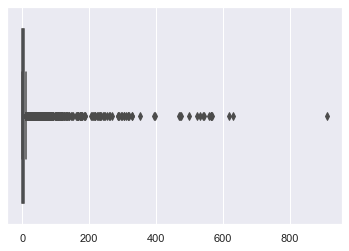

In [62]:
sns.boxplot(tmp)  # 'bad distribution'

##### 2) List rare tokens

In [63]:
# unique words --> not useful

tmp = pd.Series(corpus).value_counts()
list_unique_words = tmp[tmp == 1]
list_unique_words[:30]

paraben         1
vinegar         1
glycol          1
oodles          1
ingredients     1
skip            1
bullshit        1
word            1
soapking        1
hop             1
arabicoudh      1
grass           1
students        1
979             1
leafs           1
vegetarian      1
length225       1
6645            1
quantities      1
sscp            1
582             1
appreciation    1
flawers         1
tulip           1
playing         1
balls           1
ballsech        1
repeatedly      1
pmr1918         1
pmba1872        1
dtype: int64

In [64]:
len(list_unique_words)

2114

In [65]:
list_unique_words = list(list_unique_words.index)
list_unique_words[:10]

['paraben',
 'vinegar',
 'glycol',
 'oodles',
 'ingredients',
 'skip',
 'bullshit',
 'word',
 'soapking',
 'hop']

In [66]:
# save it for later

tmp = pd.DataFrame({"words": list_unique_words})
tmp.to_csv(output_path + "unique_words.csv", index=False)

In [67]:
# idem for 2 times

tmp = pd.Series(corpus).value_counts()
list_max_2_words = tmp[tmp <= 2]
list_max_2_words[:10]

pokizo      2
knows       2
deluxe      2
prestige    2
birds       2
thus        2
styles      2
880         2
dean        2
stage       2
dtype: int64

In [68]:
len(list_max_2_words)

3446

In [69]:
# save it

list_max_2_words = list(list_max_2_words.index)
tmp = pd.DataFrame({"words": list_max_2_words})
tmp.to_csv(output_path + "max_2_words.csv", index=False)

In [70]:
# idem for 5 times

tmp = pd.Series(corpus).value_counts()
list_max_5_words = tmp[tmp <= 5]
list_max_5_words[:10]

opener       5
dummy        5
marvel       5
ordinary     5
following    5
watche       5
belt         5
layers       5
trendnet     5
burner       5
dtype: int64

In [71]:
len(list_max_5_words)

4677

In [72]:
# save it

list_max_5_words = list(list_max_5_words.index)
tmp = pd.DataFrame({"words": list_max_5_words})
tmp.to_csv(output_path + "max_5_words.csv", index=False)

##### 3) 2nd cleaning function

In [73]:
display_tokens_info(corpus)

nb tokens 61452, nb tokens uniques 6165
['key', 'features', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '213', 'cm', 'height', 'pack', '2', 'price', 'rs', '899', 'curtain', 'enhances', 'look', 'interiors']
['curtain', 'eyelet', 'door', 'elegance', 'interiors', 'cm', 'look', '2', 'abstract', 'enhances', 'multicolor', 'price', '899', 'floral', '213', 'polyester', 'features', 'pack', 'height', 'key', 'rs']


In [74]:
len(set(corpus))

6165

In [75]:
corpus = process_text_2(raw_corpus,
                        list_rare_words=list_unique_words,
                        rejoin=False)
display_tokens_info(corpus)

nb tokens 51097, nb tokens uniques 3396
['key', 'features', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'price', 'curtain', 'enhances', 'look', 'interiors', 'curtain', 'made', 'high', 'quality', 'polyester']
['curtain', 'quality', 'eyelet', 'door', 'elegance', 'interiors', 'look', 'abstract', 'enhances', 'multicolor', 'price', 'floral', 'polyester', 'features', 'pack', 'height', 'key', 'high', 'made']


In [76]:
len(set(corpus))

3396

##### 4) Stemming and Lemmatization

Lemmatization is the process of grouping together the different inflected forms of a word, so they can be analyzed as a single item. Lemmatization is similar to stemming, but it brings context to the words. So it links words with similar meanings to one word.

Stemming is the process if producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers.

In [77]:
# +/- 3s
corpus = process_text_3(raw_corpus, rejoin=False, list_rare_words=list_unique_words)
pd.Series(corpus).sample(30)

18139           set
39293           usb
15215       ganesha
23377         royal
49921         brand
27738         light
10883         coffe
19918    manufactur
7038         parrot
29108          king
47829       silicon
49790         print
49768          leav
30903        diaper
26917         women
30648         print
16201         occas
30812     shortskey
43501           day
11262    rockmantra
26404           day
37128        insert
11743         pizza
49933          dark
21120         style
46512       dupatta
21118        storag
23186         width
12458          ship
42015         theme
dtype: object

In [78]:
display_tokens_info(corpus)

nb tokens 51097, nb tokens uniques 2773
['key', 'featur', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'price', 'curtain', 'enhanc', 'look', 'interior', 'curtain', 'made', 'high', 'qualiti', 'polyest']
['curtain', 'enhanc', 'eyelet', 'polyest', 'door', 'look', 'eleg', 'abstract', 'multicolor', 'price', 'floral', 'pack', 'height', 'key', 'interior', 'high', 'qualiti', 'made', 'featur']


In [79]:
corpus_lem = process_text_3(raw_corpus, rejoin=False, lem_or_stem="lem", list_rare_words=list_unique_words)
pd.Series(corpus_lem).sample(30)

2932            link
17036            buy
12659         polish
9036            pick
42573         artist
36191       discount
24922       flipkart
41401       feathery
9346          online
8577           price
42880           room
8052         freedom
13104      searching
17789           club
25535           cash
14340          place
57          smoothly
29118         cotton
9626     beautifully
22827          place
34867          light
7380             one
26653            com
34870          brand
45510    comfortable
7630            best
378           gifted
24564           cell
14942      resistant
45114          steel
dtype: object

In [80]:
display_tokens_info(corpus_lem)

nb tokens 51097, nb tokens uniques 3123
['key', 'feature', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'price', 'curtain', 'enhances', 'look', 'interior', 'curtain', 'made', 'high', 'quality', 'polyester']
['curtain', 'quality', 'feature', 'eyelet', 'door', 'elegance', 'look', 'abstract', 'enhances', 'multicolor', 'price', 'floral', 'polyester', 'pack', 'height', 'key', 'interior', 'high', 'made']


##### 5) Only english words

In [81]:
pd.Series(words.words()).sample(30)

192206    subintroductory
20170           begarnish
220097       unornamented
113906      menticultural
16366          autosexing
153593       prediversion
111384             mapper
55447      disoxygenation
41794         constabular
55645       dispunishable
112063           massless
79162                gowk
215904          unerected
181814         singleness
146176     phytosociology
160409           purveyal
191491         suasionist
188531           stancher
174116            sawarra
195442         surfaceman
36212               cicad
39500       colodyspepsia
58926      dyspituitarism
169836          ridgepole
13899                arui
168124          restringe
175539            scoriae
64067       equilibrative
188538           standard
74153         Fumariaceae
dtype: object

In [82]:
len(set(words.words()))

235892

In [83]:
eng_words = [i.lower() for i in words.words()]
eng_words[:30]

['a',
 'a',
 'aa',
 'aal',
 'aalii',
 'aam',
 'aani',
 'aardvark',
 'aardwolf',
 'aaron',
 'aaronic',
 'aaronical',
 'aaronite',
 'aaronitic',
 'aaru',
 'ab',
 'aba',
 'ababdeh',
 'ababua',
 'abac',
 'abaca',
 'abacate',
 'abacay',
 'abacinate',
 'abacination',
 'abaciscus',
 'abacist',
 'aback',
 'abactinal',
 'abactinally']

In [84]:
len(set(eng_words))

234377

In [85]:
ps = PorterStemmer()
eng_words_stem = [ps.stem(i) for i in eng_words]
display_tokens_info(eng_words_stem)

nb tokens 236736, nb tokens uniques 178311
['a', 'a', 'aa', 'aal', 'aalii', 'aam', 'aani', 'aardvark', 'aardwolf', 'aaron', 'aaron', 'aaron', 'aaronit', 'aaronit', 'aaru', 'ab', 'aba', 'ababdeh', 'ababua', 'abac', 'abaca', 'abac', 'abacay', 'abacin', 'abacin', 'abaciscu', 'abacist', 'aback', 'abactin', 'abactin']
['aal', 'abaca', 'abactin', 'aa', 'aardwolf', 'aalii', 'aaron', 'abac', 'abaciscu', 'abacist', 'aardvark', 'aam', 'ab', 'aaronit', 'ababua', 'abacay', 'abacin', 'aback', 'aba', 'a', 'ababdeh', 'aaru', 'aani']


In [86]:
len(set(eng_words_stem))

178311

In [87]:
lm = WordNetLemmatizer()
eng_words_lem = [lm.lemmatize(i) for i in eng_words]
display_tokens_info(eng_words_lem)

nb tokens 236736, nb tokens uniques 233450
['a', 'a', 'aa', 'aal', 'aalii', 'aam', 'aani', 'aardvark', 'aardwolf', 'aaron', 'aaronic', 'aaronical', 'aaronite', 'aaronitic', 'aaru', 'ab', 'aba', 'ababdeh', 'ababua', 'abac', 'abaca', 'abacate', 'abacay', 'abacinate', 'abacination', 'abaciscus', 'abacist', 'aback', 'abactinal', 'abactinally']
['aal', 'aaronitic', 'abacate', 'abaca', 'aaronical', 'aa', 'aardwolf', 'aalii', 'aaronic', 'aaron', 'aaronite', 'abac', 'abacination', 'abaciscus', 'abacinate', 'abacist', 'aardvark', 'abactinal', 'aam', 'ab', 'ababua', 'abacay', 'abactinally', 'aback', 'aba', 'a', 'ababdeh', 'aaru', 'aani']


In [88]:
len(set(eng_words_lem))

233450

In [89]:
corpus = process_text_4(raw_corpus, rejoin=False, lem_or_stem="stem", list_rare_words=list_unique_words,
                        eng_words=eng_words_stem)

display_tokens_info(corpus)

nb tokens 45937, nb tokens uniques 2166
['key', 'featur', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'price', 'curtain', 'enhanc', 'look', 'interior', 'curtain', 'made', 'high', 'qualiti', 'polyest']
['curtain', 'enhanc', 'eyelet', 'polyest', 'door', 'look', 'eleg', 'abstract', 'multicolor', 'price', 'floral', 'pack', 'height', 'key', 'interior', 'high', 'qualiti', 'made', 'featur']


In [90]:
len(set(corpus))

2166

In [91]:
corpus_lem = process_text_4(raw_corpus, rejoin=False, lem_or_stem="lem", list_rare_words=list_unique_words,
                            eng_words=eng_words_lem)
pd.Series(corpus_lem).sample(30)

41086           cash
17958        adapter
6525            cute
17995        package
15034            set
13726           sofa
17664          india
19553          brand
42076           wall
15462    replacement
32800      sensitive
38909           code
20169      insurance
2432          glossy
33031           wide
9479          coffee
10734          wheel
41578           girl
40349          color
5860            sale
42115            box
8784             day
36636            pic
19342       ordinary
21003          offer
13881       junction
4793           least
4501           brand
43812        quality
7728             tea
dtype: object

In [92]:
len(set(corpus_lem))

2333

In [93]:
corpus

['key',
 'featur',
 'eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'height',
 'pack',
 'price',
 'curtain',
 'enhanc',
 'look',
 'interior',
 'curtain',
 'made',
 'high',
 'qualiti',
 'polyest',
 'fabric',
 'featur',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'ring',
 'make',
 'room',
 'environ',
 'curtain',
 'ant',
 'wrinkl',
 'anti',
 'shrinkag',
 'eleg',
 'give',
 'home',
 'bright',
 'appeal',
 'design',
 'attent',
 'sure',
 'contemporari',
 'eyelet',
 'curtain',
 'slide',
 'smoothli',
 'draw',
 'apart',
 'first',
 'thing',
 'morn',
 'welcom',
 'bright',
 'sun',
 'ray',
 'want',
 'wish',
 'good',
 'morn',
 'whole',
 'world',
 'draw',
 'even',
 'creat',
 'special',
 'moment',
 'beauti',
 'given',
 'sooth',
 'print',
 'bring',
 'home',
 'eleg',
 'curtain',
 'light',
 'room',
 'get',
 'right',
 'amount',
 'sunlight',
 'specif',
 'eleg',
 'polyest',
 

In [94]:
corpus_lem

['key',
 'feature',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'height',
 'pack',
 'price',
 'curtain',
 'look',
 'interior',
 'curtain',
 'made',
 'high',
 'quality',
 'polyester',
 'fabric',
 'feature',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'ring',
 'make',
 'room',
 'environment',
 'curtain',
 'ant',
 'wrinkle',
 'anti',
 'shrinkage',
 'elegant',
 'give',
 'home',
 'bright',
 'appeal',
 'design',
 'attention',
 'sure',
 'contemporary',
 'eyelet',
 'curtain',
 'slide',
 'smoothly',
 'draw',
 'apart',
 'first',
 'thing',
 'morning',
 'welcome',
 'bright',
 'sun',
 'ray',
 'want',
 'wish',
 'good',
 'morning',
 'whole',
 'world',
 'draw',
 'evening',
 'create',
 'special',
 'moment',
 'beauty',
 'given',
 'soothing',
 'print',
 'bring',
 'home',
 'elegant',
 'curtain',
 'light',
 'room',
 'get',
 'right',
 'amount',
 'sunlight',

In [95]:
tmp = pd.Series(corpus_lem).value_counts()
tmp

product        863
free           618
delivery       567
cash           564
shipping       564
              ... 
captivating      2
nexus            2
teal             2
extended         2
film             2
Length: 2333, dtype: int64

In [96]:
##sns.barplot(x=tmp.index, y=tmp.values)

##### 6) Wordcloud

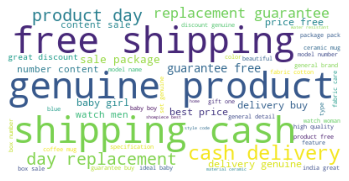

In [97]:
display_wordcloud([corpus_lem])

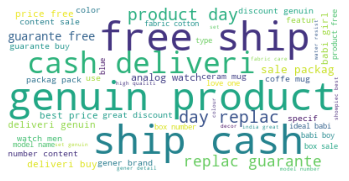

In [98]:
display_wordcloud([corpus])

#### Divide the corpus

##### 1) Separate the 7 categories

In [99]:
for i in range(7):
    globals()["df_" + str(i)] = data_text[data_text.target == i]

In [100]:
df_0.head()

,product_name,text,category,target
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0
40,Mom and Kid Baby Girl's Printed Green Top & Py...,Key Features of Mom and Kid Baby Girl's Printe...,Baby Care,0
42,"Mom and Kid Baby Girl's Printed Blue, Grey Top...",Key Features of Mom and Kid Baby Girl's Printe...,Baby Care,0
63,KOHL Wine Bag Yellow,Key Features of KOHL Wine Bag Yellow Easy to c...,Baby Care,0


In [101]:
df_6.head()

,product_name,text,category,target
5,Maserati Time R8851116001 Analog Watch - For ...,Maserati Time R8851116001 Analog Watch - For ...,Watches,6
6,"Camerii WM64 Elegance Analog Watch - For Men,...","Camerii WM64 Elegance Analog Watch - For Men,...",Watches,6
7,T STAR UFT-TSW-005-BK-BR Analog Watch - For Boys,T STAR UFT-TSW-005-BK-BR Analog Watch - For B...,Watches,6
8,"Alfajr WY16B Youth Digital Watch - For Men, Boys","Alfajr WY16B Youth Digital Watch - For Men, B...",Watches,6
9,TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...,TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...,Watches,6


In [102]:
for i in range(7):
    globals()["corpus_" + str(i)] = " ".join(globals()["df_" + str(i)].text)

In [103]:
corpus_0[:100]

'Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features M'

In [104]:
len(corpus_0)

72541

In [105]:
len(corpus_6)

49083

##### 2) Process all of them

In [106]:
for i in range(7):
    print("\n\n__Before__Category__{}".format(str(i)))
    display_tokens_info(globals()["corpus_" + str(i)])



__Before__Category__0
nb tokens 72541, nb tokens uniques 93
Specifications of Sathiyas Cot
['S', 'y', 'c', 'p', 't', 's', 'n', ' ', 'e', 'h', 'C', 'o', 'f', 'a', 'i']


__Before__Category__1
nb tokens 56618, nb tokens uniques 83
Key Features of Burt s Bees Ha
['y', 'F', 't', 's', ' ', 'r', 'e', 'K', 'H', 'o', 'f', 'a', 'B', 'u']


__Before__Category__2
nb tokens 83329, nb tokens uniques 87
Key Features of D-Link DAP1320
['y', 'F', 's', 'K', 'f', 't', '0', 'n', '2', ' ', 'r', 'i', 'A', '1', '3', 'L', 'k', 'u', 'P', 'e', 'D', 'o', 'a', '-']


__Before__Category__3
nb tokens 84704, nb tokens uniques 92
Myesquire Ceramic Burner Pot L
['y', 'c', 's', 'C', 'm', 't', 'n', 'q', ' ', 'r', 'M', 'i', 'B', 'L', 'u', 'P', 'e', 'o', 'a']


__Before__Category__4
nb tokens 57118, nb tokens uniques 84
Key Features of Elegance Polye
['y', 'F', 'c', 'P', 't', 's', 'l', 'n', 'E', ' ', 'r', 'e', 'K', 'o', 'f', 'a', 'u', 'g']


__Before__Category__5
nb tokens 95162, nb tokens uniques 85
Key Features of Du

In [107]:
for i in range(7):
    globals()["corpus_" + str(i)] = process_text_4(globals()["corpus_" + str(i)],
                                                   rejoin=False,
                                                   list_rare_words=list_unique_words,
                                                   eng_words=eng_words_stem)

In [108]:
for i in range(7):
    print("\n\n__After__Category__{}".format(str(i)))
    display_tokens_info(globals()["corpus_" + str(i)])



__After__Category__0
nb tokens 7813, nb tokens uniques 790
['specif', 'cotton', 'bath', 'towel', 'bath', 'towel', 'red', 'yellow', 'blue', 'bath', 'towel', 'featur', 'machin', 'washabl', 'ye', 'materi', 'cotton', 'design', 'self', 'design', 'gener', 'brand', 'type', 'bath', 'towel', 'model', 'name', 'cotton', 'bath', 'towel']
['red', 'brand', 'blue', 'machin', 'self', 'washabl', 'yellow', 'bath', 'materi', 'type', 'specif', 'design', 'model', 'cotton', 'towel', 'ye', 'gener', 'name', 'featur']


__After__Category__1
nb tokens 5050, nb tokens uniques 769
['key', 'featur', 'burt', 'bee', 'hair', 'repair', 'shea', 'grapefruit', 'deep', 'condition', 'ideal', 'boy', 'girl', 'appli', 'deep', 'condit', 'hair', 'condit', 'damag', 'hair', 'hair', 'type', 'dri', 'hair', 'specif', 'burt', 'bee', 'hair', 'repair', 'shea']
['grapefruit', 'shea', 'repair', 'burt', 'appli', 'girl', 'ideal', 'hair', 'type', 'specif', 'boy', 'bee', 'damag', 'dri', 'key', 'deep', 'featur', 'condit', 'condition']


__A

In [109]:
corpus_list = [globals()["corpus_" + str(i)] for i in range(7)]

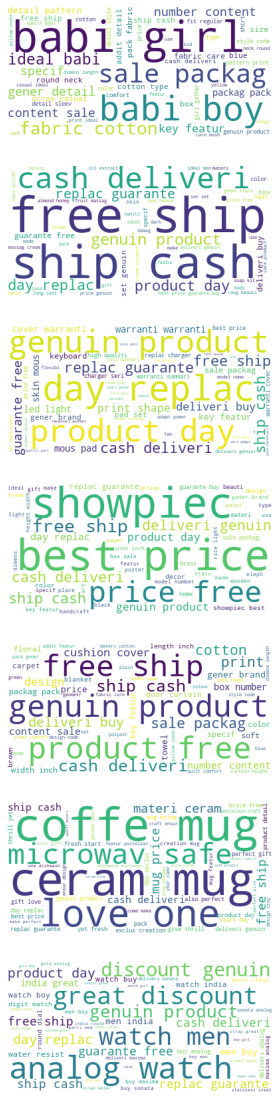

In [110]:
display_wordcloud(corpus_list)

In [111]:
pd.Series(corpus_0).value_counts().head(10)

babi      316
girl      197
cotton    191
detail    180
fabric    164
boy       112
print     105
dress     105
specif    100
ideal      98
dtype: int64

In [112]:
pd.Series(corpus_6).value_counts().head(10)

watch       354
analog      256
men         158
product     136
day         136
deliveri    134
replac      134
cash        134
ship        134
free        134
dtype: int64

##### Duplicated words in all of the 7 categories

In [113]:
n = 10
doublons = [i for i in pd.Series(corpus_0).value_counts().head(n).index if
            i in pd.Series(corpus_1).value_counts().head(n).index]

doublons

[]

In [114]:
n = 20
doublons = [i for i in pd.Series(corpus_0).value_counts().head(n).index if
            i in pd.Series(corpus_1).value_counts().head(n).index]

doublons

['type', 'color']

In [115]:
n = 30
doublons = [i for i in pd.Series(corpus_0).value_counts().head(n).index if
            i in pd.Series(corpus_1).value_counts().head(n).index]

doublons

['specif',
 'ideal',
 'gener',
 'featur',
 'type',
 'color',
 'pack',
 'price',
 'box',
 'product',
 'set']

In [116]:
duplicated_words_set = generate_duplicated_words_list(corpus_list, n=10)

__Step_1__
__Step_2__
__Step_3__
__Step_4__
__Step_5__
__Step_6__
__Step_7__
__Step_8__
__Step_9__
__Step_10__
__Step_11__
__Step_12__
__Step_13__
__Step_14__
__Step_15__
__Step_16__
__Step_17__
__Step_18__
__Step_19__
__Step_20__
__Step_21__
The length of the list of duplicated words is 51
The length of the set of duplicated words is 12


In [117]:
duplicated_words_set

['cash',
 'ship',
 'buy',
 'deliveri',
 'price',
 'design',
 'cotton',
 'guarante',
 'replac',
 'day',
 'product',
 'free']

#### Final cleaning

In [118]:
l = [w for w in list_unique_words if w in eng_words]
print(len(l))

768


In [119]:
len(l)

768

In [120]:
l = [w for w in list_unique_words if w not in eng_words_stem]
print(len(l))

1702


##### 1) cleaning per document

In [121]:
#data["clean_text"] = data.text.apply(final_clean)
#df = data.copy()
#df["clean_text"] = df.text.parallel_apply(final_clean)

In [122]:
data_text["clean_text"] = data_text.text.apply(
    lambda x: final_clean(x, process_text_5, "stem", l, eng_words_stem, duplicated_words_set))  # l / list_unique_words

In [123]:
data_text.sample(20)

,product_name,text,category,target,clean_text
919,Anjalika Brass Laddu Gopal Showpiece - 6 cm,Buy Anjalika Brass Laddu Gopal Showpiece - 6...,Home Decor & Festive Needs,3,brass showpiec brass showpiec best genuin
388,Anna Andre Paris Set of Dark Fire & Numero 1 D...,Flipkart.com: Buy Anna Andre Paris Set of Dark...,Beauty and Personal Care,1,anna andr pari set dark fire numero deodor set...
809,Oxyglow Lacto Bleach & Fruit Massage Cream Wit...,Oxyglow Lacto Bleach & Fruit Massage Cream Wit...,Beauty and Personal Care,1,lacto bleach fruit massag cream vitamin set br...
499,Maxima 03918CMLY Analog Watch - For Women,Maxima 03918CMLY Analog Watch - For Women - B...,Watches,6,maxima analog watch maxima analog watch india ...
78,Jaipur Print Cotton Floral Diwan Set,Key Features of Jaipur Print Cotton Floral Diw...,Home Furnishing,4,key featur print floral set fast colour hand p...
220,Poppins Printed Baby Boy's Jumpsuit,Poppins Printed Baby Boy's Jumpsuit\r\n ...,Baby Care,0,poppin print babi boy high qualiti full sleev ...
443,Tidy Printed Cushions Cover,Key Features of Tidy Printed Cushions Cover 10...,Home Furnishing,4,key featur tidi print cushion cover pure high ...
687,Jovees Anjeer & Carrot Sunblock (Pack of 2) - ...,Flipkart.com: Buy Jovees Anjeer & Carrot Sunbl...,Beauty and Personal Care,1,carrot pack genuin
958,"M S Rugs Pink, Blue Wool Dhurrie","Key Features of M S Rugs Pink, Blue Wool Dhurr...",Home Furnishing,4,key featur rug pink blue wool pattern geometr ...
45,AKUP i-love-my-mom Ceramic Mug,Key Features of AKUP i-love-my-mom Ceramic Mug...,Kitchen & Dining,5,key featur love ceram mug pack mug love ceram ...


In [124]:
sub_data = data_text[data_text.target == 0]

for index, series in sub_data.sample(10).iterrows():
    print("__Before__")
    print(series["text"], end="\n\n")
    print("__After__")
    print(series["clean_text"], end="\n\n\n")
    print()

__Before__
Flipkart.com is offering Lollipop Lane Tiddly Wink Safari Bath Set for only for Rs 2950 | Flipkart.com. Only Genuine Products. Free Shipping. Cash On Delivery!

__After__
offer lollipop lane wink safari bath set genuin



__Before__
Specifications of Kushies baby Baby Girl's Shrug General Details Pattern Striped Occasion Casual Ideal For Baby Girl's Shrug Details Sleeve Full Sleeve Fabric Cotton rib 200gsm Pattern Striped In the Box 1 Shrug

__After__
specif babi babi girl shrug gener detail pattern stripe occas casual ideal babi girl shrug detail sleev full sleev fabric rib pattern stripe box shrug



__Before__
Key Features of Chokree Baby Girl's, Girl's A-line Dress Pink A-line,Specifications of Chokree Baby Girl's, Girl's A-line Dress Dimensions Length Maxi/Full Length General Details Ideal For Baby Girl's, Girl's Occasion Party Dress Details Fabric Synthetic Type A-line

__After__
key featur babi girl girl line dress pink line specif babi girl girl line dress dimens len

In [125]:
# check no missing values
data_text.isna().mean()

product_name    0.0
text            0.0
category        0.0
target          0.0
clean_text      0.0
dtype: float64

##### 2) cleaning corpus (per category) (like above) : to display wordcloud

In [126]:
for i in range(7):
    globals()["df_clean_" + str(i)] = data_text[data_text.target == i]

In [127]:
df_clean_0.head()

,product_name,text,category,target,clean_text
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0,specif bath towel bath towel red yellow blue b...
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0,key featur terri face towel set size small hei...
40,Mom and Kid Baby Girl's Printed Green Top & Py...,Key Features of Mom and Kid Baby Girl's Printe...,Baby Care,0,key featur kid babi girl print green top pyjam...
42,"Mom and Kid Baby Girl's Printed Blue, Grey Top...",Key Features of Mom and Kid Baby Girl's Printe...,Baby Care,0,key featur kid babi girl print blue grey top p...
63,KOHL Wine Bag Yellow,Key Features of KOHL Wine Bag Yellow Easy to c...,Baby Care,0,key featur kohl wine bag yellow easi carri bit...


In [128]:
for i in range(7):
    globals()["corpus_clean_" + str(i)] = " ".join(globals()["df_clean_" + str(i)].clean_text)

for i in range(7):
    globals()["corpus_clean_" + str(i)] = process_text_5(globals()["corpus_clean_" + str(i)],
                                                         rejoin=False,
                                                         lem_or_stem="stem",
                                                         list_rare_words=list_unique_words,
                                                         eng_words=eng_words_stem,
                                                         extra_words=duplicated_words_set)

In [129]:
corpus_clean_list = [globals()["corpus_clean_" + str(i)] for i in range(7)]

In [130]:
corpus_clean_0[:5]

['specif', 'bath', 'towel', 'bath', 'towel']

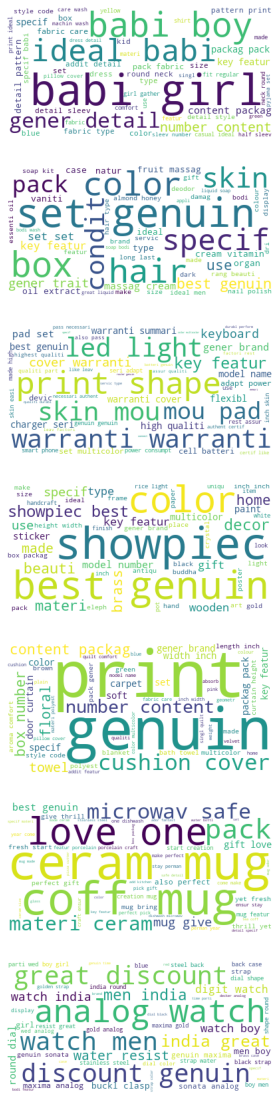

In [131]:
display_wordcloud(corpus_clean_list)

#### Cleaning product_name

In [132]:
raw_corpus = "".join(data_text.product_name.values)
print(raw_corpus[:100])
print(len(raw_corpus))

Elegance Polyester Multicolor Abstract Eyelet Door CurtainSathiyas Cotton Bath TowelEurospa Cotton T
47357


In [133]:
corpus = process_text_1(raw_corpus)
display_tokens_info(corpus)

nb tokens 6191, nb tokens uniques 2531
['elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtainsathiyas', 'cotton', 'bath', 'toweleurospa', 'cotton', 'terry', 'face', 'towel', 'setsantosh', 'royal', 'fashion', 'cotton', 'printed', 'king', 'sized', 'double', 'bedsheetjaipur', 'print', 'cotton', 'floral', 'king', 'sized', 'double', 'bedsheetmaserati']
['double', 'sized', 'eyelet', 'terry', 'king', 'door', 'elegance', 'bath', 'bedsheetmaserati', 'bedsheetjaipur', 'royal', 'abstract', 'multicolor', 'toweleurospa', 'cotton', 'curtainsathiyas', 'floral', 'print', 'printed', 'towel', 'polyester', 'face', 'setsantosh', 'fashion']


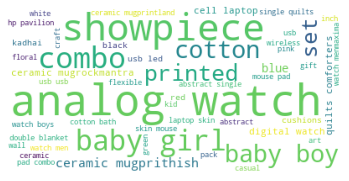

In [134]:
display_wordcloud([corpus])

In [135]:
for i in range(7):
    globals()["corpus_product_name_" + str(i)] = " ".join(globals()["df_" + str(i)].product_name)


In [136]:
corpus_product_name_0[:100]

"Sathiyas Cotton Bath Towel Eurospa Cotton Terry Face Towel Set Mom and Kid Baby Girl's Printed Green"

In [137]:
len(corpus_product_name_0)

6137

In [138]:
for i in range(7):
    print("\n\n__Before__Category__{}".format(str(i)))
    display_tokens_info(globals()["corpus_product_name_" + str(i)])




__Before__Category__0
nb tokens 6137, nb tokens uniques 69
Sathiyas Cotton Bath Towel Eur
['S', 'y', 's', 'l', 'h', 'C', 'E', 't', 'n', ' ', 'T', 'r', 'i', 'B', 'u', 'w', 'e', 'o', 'a']


__Before__Category__1
nb tokens 7221, nb tokens uniques 74
Burt s Bees Hair Repair Shea A
['S', 'A', 't', 'p', 's', ' ', 'r', 'e', 'h', 'H', 'R', 'a', 'i', 'B', 'u']


__Before__Category__2
nb tokens 7499, nb tokens uniques 72
D-Link DAP1320 RoQ Slim Multim
['S', 'l', 'm', 'Q', '0', 't', 'n', '2', ' ', 'M', 'i', 'A', '1', '3', 'L', 'R', 'k', 'u', 'P', 'D', 'o', '-']


__Before__Category__3
nb tokens 7890, nb tokens uniques 72
Myesquire Ceramic Burner Pot L
['y', 'c', 's', 'C', 'm', 't', 'n', 'q', ' ', 'r', 'M', 'i', 'B', 'L', 'u', 'P', 'e', 'o', 'a']


__Before__Category__4
nb tokens 6503, nb tokens uniques 66
Elegance Polyester Multicolor 
['a', 'y', 'c', 'P', 't', 'l', 'n', 's', ' ', 'r', 'e', 'M', 'o', 'g', 'E', 'i', 'u']


__Before__Category__5
nb tokens 6021, nb tokens uniques 73
Dungri India C

In [139]:
for i in range(7):
    globals()["corpus_product_name_" + str(i)] = process_text_4(globals()["corpus_product_name_" + str(i)],
                                                                rejoin=False,
                                                                list_rare_words=[],
                                                                eng_words=eng_words_stem)

In [140]:
for i in range(7):
    print("\n\n__After__Category__{}".format(str(i)))
    display_tokens_info(globals()["corpus_product_name_" + str(i)])




__After__Category__0
nb tokens 746, nb tokens uniques 249
['cotton', 'bath', 'towel', 'cotton', 'terri', 'face', 'towel', 'set', 'kid', 'babi', 'girl', 'print', 'green', 'top', 'pyjama', 'set', 'kid', 'babi', 'girl', 'print', 'blue', 'grey', 'top', 'pyjama', 'set', 'kohl', 'wine', 'bag', 'yellow', 'cozi']
['wine', 'blue', 'green', 'pyjama', 'grey', 'kid', 'bag', 'yellow', 'bath', 'girl', 'babi', 'cozi', 'kohl', 'cotton', 'print', 'towel', 'set', 'face', 'top', 'terri']


__After__Category__1
nb tokens 731, nb tokens uniques 331
['burt', 'bee', 'hair', 'repair', 'shea', 'grapefruit', 'deep', 'condition', 'suav', 'natur', 'everlast', 'sunshin', 'condition', 'make', 'vaniti', 'case', 'nail', 'polish', 'black', 'lipstick', 'import', 'nail', 'polish', 'black', 'lipstick', 'import', 'scienc', 'dandruff', 'control', 'shampoo']
['make', 'suav', 'grapefruit', 'lipstick', 'shea', 'repair', 'burt', 'black', 'sunshin', 'scienc', 'hair', 'dandruff', 'control', 'polish', 'nail', 'import', 'everlas

In [141]:
corpus_list_product_name = [globals()["corpus_product_name_" + str(i)] for i in range(7)]


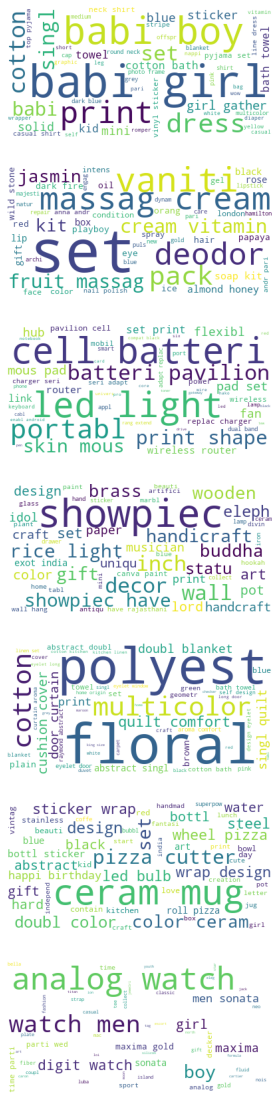

In [142]:
display_wordcloud(corpus_list_product_name)

In [143]:
duplicated_words_set = generate_duplicated_words_list(corpus_list_product_name, n=15)
print(duplicated_words_set)

__Step_1__
__Step_2__
__Step_3__
__Step_4__
__Step_5__
__Step_6__
__Step_7__
__Step_8__
__Step_9__
__Step_10__
__Step_11__
__Step_12__
__Step_13__
__Step_14__
__Step_15__
__Step_16__
__Step_17__
__Step_18__
__Step_19__
__Step_20__
__Step_21__
The length of the list of duplicated words is 16
The length of the set of duplicated words is 11
['singl', 'light', 'sticker', 'led', 'boy', 'girl', 'cotton', 'print', 'towel', 'set', 'doubl']


In [144]:
# idem for 2 times

tmp = pd.Series(corpus).value_counts()
list_max_1_words_product_name = tmp[tmp <= 1]
print(list_max_1_words_product_name[:10])

# save it

list_max_1_words_product_name = list(list_max_1_words_product_name.index)
tmp = pd.DataFrame({"words": list_max_1_words_product_name})
tmp.to_csv(output_path + "product_name_max_1_words.csv", index=False)

carexemex           1
303                 1
38015pl01           1
prabhavali          1
menchappin          1
gtidy               1
multicolorireeya    1
wq18                1
careoxyglow         1
cmantiqueshop       1
dtype: int64


In [145]:
data_text["clean_product_name"] = data_text.product_name.apply(
    lambda x: final_clean(x, process_text_5, "stem", list_max_1_words_product_name, eng_words_stem,
                          []))  # list_max_1_words_product_name duplicated_words_set

In [146]:
data_text.sample(10)

,product_name,text,category,target,clean_text,clean_product_name
493,Lapguard Acer Aspire 4741G-5464G50Mn Replaceme...,Buy Lapguard Acer Aspire 4741G-5464G50Mn Repla...,Computers,2,acer cell batteri genuin,replac cell batteri
461,vatika Advance Standard Idli Maker,Key Features of vatika Advance Standard Idli M...,Kitchen & Dining,5,key featur advanc standard idli maker plate ad...,maker
372,"Wild Stone Charge,Surge Combo Set","Flipkart.com: Buy Wild Stone Charge,Surge Comb...",Beauty and Personal Care,1,wild stone charg set genuin,wild stone set
263,Woodino Handicrafts Showpiece - 6.5 cm,Buy Woodino Handicrafts Showpiece - 6.5 cm f...,Home Decor & Festive Needs,3,handicraft showpiec handicraft showpiec best g...,handicraft showpiec
175,Prithish I'm A Mom. What'S Your Superpower? Re...,Buy Prithish I'm A Mom. What'S Your Superpower...,Kitchen & Dining,5,superpow red blue bubbl doubl colour ceram mug...,superpow red blue bubbl doubl ceram mug
597,LITTLE FEETZ Baby Girl's Solid Top & Skirt Set,Key Features of LITTLE FEETZ Baby Girl's Solid...,Baby Care,0,key featur littl babi girl solid top skirt set...,babi girl solid top set
1008,King Traders KI-BD-01 1 Kitchen Tool Set,King Traders KI-BD-01 1 Kitchen Tool Set Price...,Kitchen & Dining,5,king trader kitchen tool set amongst manufactu...,king trader kitchen set
718,Home Originals Abstract Double Quilts & Comfor...,Buy Home Originals Abstract Double Quilts & Co...,Home Furnishing,4,home origin abstract doubl quilt comfort multi...,home origin abstract doubl quilt comfort multi...
708,Indigocart Plain Double Dohar Grey,Buy Indigocart Plain Double Dohar Grey at Rs. ...,Home Furnishing,4,plain doubl grey genuin,plain doubl grey
353,Asus DSL-N10E Wireless-N150 ADSL Modem Router,Buy Asus DSL-N10E Wireless-N150 ADSL Modem Rou...,Computers,2,wireless router genuin,wireless router


In [147]:
sub_data = data_text[data_text.target == 0]

for index, series in sub_data.sample(15).iterrows():
    print("__Before__")
    print(series["product_name"], end="\n\n")
    print("__After__")
    print(series["clean_product_name"], end="\n\n\n")
    print()

__Before__
Portia Polka Print Trendy Cap

__After__
portia polka print cap



__Before__
Dongli Striped Baby Boy's Polo Neck T-Shirt

__After__
stripe babi boy polo neck



__Before__
MKB Baby Girl's Empire Waist Dress

__After__
babi girl



__Before__
Elite Collection Medium Acrylic Sticker

__After__
elit collect medium sticker



__Before__
Baby Bucket SHERIN MULTI BEAR Sleeping Bag

__After__
babi bucket



__Before__
MyKid Nappy

__After__
nappi



__Before__
YK Striped Baby Boy's Round Neck T-Shirt

__After__
stripe babi boy round neck



__Before__
BabyBucket Cotton Bath Towel

__After__
cotton bath towel



__Before__
Offspring Printed Single Wrapper Multicolor

__After__
offspr print singl wrapper multicolor



__Before__
CHINMAY KIDS Printed Cotton Padded Mosquito Net

__After__
kid print cotton net



__Before__
HEAVENLY Dress Baby Boy's  Combo

__After__
heavenli babi boy



__Before__
Munchkin Mighty Grip Trainer Cup

__After__
cup



__Before__
Mee Mee Multifunctional Nu

In [148]:
print("Counting number of words in each row / product")
data_text["_len_clean_text_"] = data_text.clean_text.str.split().apply(len)
data_text["_len_clean_product_name_"] = data_text.clean_product_name.str.split().apply(len)


Counting number of words in each row / product


In [149]:
data_text.head(5)

,product_name,text,category,target,clean_text,clean_product_name,_len_clean_text_,_len_clean_product_name_
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4,key featur eleg polyest multicolor abstract ey...,eleg polyest multicolor abstract eyelet door,136,6
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0,specif bath towel bath towel red yellow blue b...,cotton bath towel,49,3
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0,key featur terri face towel set size small hei...,cotton terri face towel set,118,5
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4,key featur royal fashion print king size doubl...,royal fashion cotton print king size doubl,89,7
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4,key featur print floral king size doubl print ...,print cotton floral king size doubl,118,6


In [150]:
#data_text["_len_clean_text_"].sort_values()
data_text[data_text["_len_clean_text_"] == 0]

,product_name,text,category,target,clean_text,clean_product_name,_len_clean_text_,_len_clean_product_name_


<AxesSubplot:xlabel='_len_clean_text_'>

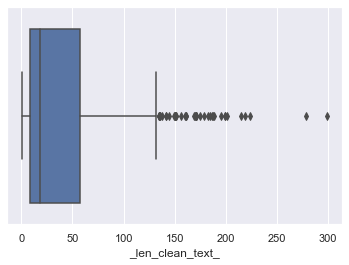

In [151]:
sns.boxplot(data_text["_len_clean_text_"])

In [152]:
data_text[data_text["_len_clean_product_name_"] == 0]

,product_name,text,category,target,clean_text,clean_product_name,_len_clean_text_,_len_clean_product_name_
59,Brillare Science Dandruff Control Shampoo & In...,Specifications of Brillare Science Dandruff Co...,Beauty and Personal Care,1,specif scienc dandruff control shampoo set set...,,23,0
119,FRENEMY MPAD271 Mousepad,Key Features of FRENEMY MPAD271 Mousepad smoot...,Computers,2,key featur smooth surfac finish move quickli g...,,80,0
243,Suruchi Kadhai 4.5 L,Buy Suruchi Kadhai 4.5 L for Rs.965 online. Su...,Kitchen & Dining,5,best genuin,,2,0
244,Bergner Kadhai NA L,"Bergner Kadhai NA L (Aluminium, Non-stick)\r\n...",Kitchen & Dining,5,aluminium non stick get strong temper glass li...,,51,0
245,Kalash Kadhai 11.5 L,Buy Kalash Kadhai 11.5 L for Rs.1584 online. K...,Kitchen & Dining,5,best genuin,,2,0
246,Peacock Kadhai 3.8 L,Buy Peacock Kadhai 3.8 L for Rs.1155 online. P...,Kitchen & Dining,5,peacock peacock best genuin,,4,0
251,Kalash Kadhai 3.5 L,Buy Kalash Kadhai 3.5 L for Rs.549 online. Kal...,Kitchen & Dining,5,best genuin,,2,0
252,Metallino Kadhai NA L,Buy Metallino Kadhai NA L for Rs.721 online. M...,Kitchen & Dining,5,best genuin,,2,0
255,Jaipan KD2.5 Kadhai 2.5 L,Buy Jaipan KD2.5 Kadhai 2.5 L for Rs.499 onlin...,Kitchen & Dining,5,best genuin,,2,0
259,Nirlon Kadhai 3 L,Buy Nirlon Kadhai 3 L for Rs.785 online. Nirlo...,Kitchen & Dining,5,best genuin,,2,0


We can see that this preprocessing made 42 products with empty values for thei product name.

<AxesSubplot:xlabel='_len_clean_product_name_'>

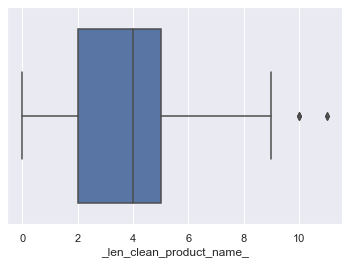

In [153]:
sns.boxplot(data_text["_len_clean_product_name_"])

In [154]:
data_text[(data_text["_len_clean_product_name_"] == 0) & (data_text["_len_clean_text_"] == 0)]

,product_name,text,category,target,clean_text,clean_product_name,_len_clean_text_,_len_clean_product_name_


#### We have tried another cleaning method to optimize the use of bag-of-words, BERT and USE.

In [155]:
# another cleaning method
data_text['text_bag-of-words'] = data_text['text'].apply(lambda x : transform_bow_fct(x))
data_text['text_bag-of-words_lem'] = data_text['text'].apply(lambda x : transform_bow_lem_fct(x))
data_text['text_deeplearning'] = data_text['text'].apply(lambda x : transform_dl_fct(x))
data_text.shape

(1050, 11)

In [156]:
data_text['length_bag-of-words'] = data_text['text_bag-of-words'].apply(lambda x : len(word_tokenize(x)))
print("max length bag-of-words : ", data_text['length_bag-of-words'].max())
data_text['length_deeplearning'] = data_text['text_deeplearning'].apply(lambda x : len(word_tokenize(x)))
print("max length deep learning : ", data_text['length_deeplearning'].max())

max length bag-of-words :  379
max length deep learning :  632


In [157]:
data_text.head()

,product_name,text,category,target,clean_text,clean_product_name,_len_clean_text_,_len_clean_product_name_,text_bag-of-words,text_bag-of-words_lem,text_deeplearning,length_bag-of-words,length_deeplearning
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4,key featur eleg polyest multicolor abstract ey...,eleg polyest multicolor abstract eyelet door,136,6,key features elegance polyester multicolor abs...,key feature elegance polyester multicolor abst...,key features of elegance polyester multicolor ...,156,248
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0,specif bath towel bath towel red yellow blue b...,cotton bath towel,49,3,specifications sathiyas cotton bath towel bath...,specification sathiyas cotton bath towel bath ...,specifications of sathiyas cotton bath towel (...,63,84
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0,key featur terri face towel set size small hei...,cotton terri face towel set,118,5,key features eurospa cotton terry face towel s...,key feature eurospa cotton terry face towel se...,key features of eurospa cotton terry face towe...,158,252
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4,key featur royal fashion print king size doubl...,royal fashion cotton print king size doubl,89,7,key features santosh royal fashion cotton prin...,key feature santosh royal fashion cotton print...,key features of santosh royal fashion cotton p...,114,148
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4,key featur print floral king size doubl print ...,print cotton floral king size doubl,118,6,key features jaipur print cotton floral king s...,key feature jaipur print cotton floral king si...,key features of jaipur print cotton floral kin...,156,228


In [158]:
# save
data_text.to_csv(output_file, index=False)

In [159]:
# End of notebook time
t1 = time()
print("computing time : {:8.6f} sec".format(t1 - t0))
print("computing time : " + strftime('%H:%M:%S', gmtime(t1 - t0)))

computing time : 880.990434 sec
computing time : 00:14:40
